### Ensembled technique for predicting Parkinson's disease based on voice test

#### Aim:

1. Load the dataset  

2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of  number of structure of the file, number of attributes, types of attributes and a general  idea of likely challenges in the dataset. (2.5 points)  

3. Using univariate & bivariate analysis to check the individual attributes for their basic  statistic such as central values, spread, tails etc. What are your observations? (15  points)  

4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test).  

5. Create the model using “entropy” method of reducing the entropy and fit it to training  data. (5 points)  

6. Test the model on test data and what is the accuracy achieved. Capture the predicted  values and do a crosstab. (7.5 points)  

7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model.  What is the impact on the model accuracy? How does regularization help? (20 points)   

8. Next implement the decision tree using Random Forest and find the accuracy (10 points) 

In [1]:
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
import seaborn as sns

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
from sklearn.feature_extraction.text import CountVectorizer 

In [11]:
parkinsons_df = pd.read_csv('parkinsons.csv')

In [12]:
parkinsons_df.shape

(195, 24)

In [13]:
parkinsons_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

#### The data has 24 columns with 295 entries for each column. Except for the status column, which is our target column, rest all are of type float.

####  Label Encodings are not required - as there are no categorical variables

Since the column has spaces, brackets and %, we replace them with _ to avoid any technical issues

In [14]:
#to avoid technical issues spaces in the column names are replaced with _
parkinsons_df.columns = parkinsons_df.columns.str.replace(' ', '_')

In [15]:
parkinsons_df.columns = parkinsons_df.columns.str.replace(':', '_')

In [16]:
parkinsons_df.columns = parkinsons_df.columns.str.replace('(', '_')

In [17]:
parkinsons_df.columns = parkinsons_df.columns.str.replace(')', '')

In [18]:
parkinsons_df.columns = parkinsons_df.columns.str.replace('%', 'percent')

In [19]:
parkinsons_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                   195 non-null object
MDVP_Fo_Hz             195 non-null float64
MDVP_Fhi_Hz            195 non-null float64
MDVP_Flo_Hz            195 non-null float64
MDVP_Jitter_percent    195 non-null float64
MDVP_Jitter_Abs        195 non-null float64
MDVP_RAP               195 non-null float64
MDVP_PPQ               195 non-null float64
Jitter_DDP             195 non-null float64
MDVP_Shimmer           195 non-null float64
MDVP_Shimmer_dB        195 non-null float64
Shimmer_APQ3           195 non-null float64
Shimmer_APQ5           195 non-null float64
MDVP_APQ               195 non-null float64
Shimmer_DDA            195 non-null float64
NHR                    195 non-null float64
HNR                    195 non-null float64
status                 195 non-null int64
RPDE                   195 non-null float64
DFA                    195 non-null float64
spread1           

In [20]:
parkinsons_df.head()

,name,MDVP_Fo_Hz,MDVP_Fhi_Hz,MDVP_Flo_Hz,MDVP_Jitter_percent,MDVP_Jitter_Abs,MDVP_RAP,MDVP_PPQ,Jitter_DDP,MDVP_Shimmer,...,Shimmer_DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [21]:
parkinsons_df.tail()

,name,MDVP_Fo_Hz,MDVP_Fhi_Hz,MDVP_Flo_Hz,MDVP_Jitter_percent,MDVP_Jitter_Abs,MDVP_RAP,MDVP_PPQ,Jitter_DDP,MDVP_Shimmer,...,Shimmer_DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [22]:
parkinsons_df.sample(10)

,name,MDVP_Fo_Hz,MDVP_Fhi_Hz,MDVP_Flo_Hz,MDVP_Jitter_percent,MDVP_Jitter_Abs,MDVP_RAP,MDVP_PPQ,Jitter_DDP,MDVP_Shimmer,...,Shimmer_DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
99,phon_R01_S24_3,126.512,141.756,99.770,0.01936,0.000150,0.01159,0.00990,0.03476,0.06734,...,0.10833,0.16744,12.435,1,0.638545,0.674953,-3.760348,0.242861,2.634633,0.378483
40,phon_R01_S08_5,186.163,197.724,177.584,0.00298,0.000020,0.00165,0.00175,0.00496,0.01495,...,0.02321,0.00231,26.822,1,0.326480,0.765623,-6.647379,0.201095,2.374073,0.130554
97,phon_R01_S24_1,125.036,143.946,116.187,0.01280,0.000100,0.00743,0.00623,0.02228,0.03886,...,0.06406,0.08151,15.338,1,0.629574,0.714485,-4.020042,0.265315,2.671825,0.340623
154,phon_R01_S37_2,119.100,128.442,88.833,0.00692,0.000060,0.00393,0.00300,0.01179,0.02682,...,0.04451,0.04611,21.824,1,0.651680,0.659333,-4.239028,0.175691,2.451130,0.247455
64,phon_R01_S17_5,229.401,252.221,221.156,0.00205,0.000009,0.00114,0.00113,0.00342,0.01457,...,0.02308,0.00300,26.415,0,0.276850,0.673636,-7.496264,0.056844,2.003032,0.073581
68,phon_R01_S18_3,143.533,162.215,65.809,0.01101,0.000080,0.00647,0.00467,0.01941,0.05384,...,0.09455,0.04882,20.338,1,0.513237,0.731444,-5.869750,0.151814,2.118496,0.185580
176,phon_R01_S43_6,116.388,129.038,108.970,0.00346,0.000030,0.00169,0.00213,0.00507,0.01725,...,0.02623,0.00415,26.143,0,0.361232,0.763242,-6.016891,0.109256,2.004719,0.174429
26,phon_R01_S06_3,171.041,208.313,75.501,0.00455,0.000030,0.00250,0.00234,0.00750,0.01966,...,0.02666,0.01095,25.908,1,0.418622,0.720916,-6.183590,0.226278,2.589702,0.147403
28,phon_R01_S06_5,155.358,227.383,80.055,0.00310,0.000020,0.00159,0.00176,0.00476,0.01718,...,0.02307,0.00677,25.970,1,0.470478,0.676258,-7.120925,0.279789,2.241742,0.108514
17,phon_R01_S04_6,168.778,232.181,75.603,0.00718,0.000040,0.00284,0.00387,0.00853,0.03327,...,0.04322,0.02919,20.376,1,0.631099,0.605417,-2.931070,0.434326,3.007463,0.430788


In [23]:
parkinsons_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP_Fo_Hz,195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP_Fhi_Hz,195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP_Flo_Hz,195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP_Jitter_percent,195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP_Jitter_Abs,195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP_RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP_PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter_DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP_Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP_Shimmer_dB,195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [24]:
parkinsons_df.isna().sum()

name                   0
MDVP_Fo_Hz             0
MDVP_Fhi_Hz            0
MDVP_Flo_Hz            0
MDVP_Jitter_percent    0
MDVP_Jitter_Abs        0
MDVP_RAP               0
MDVP_PPQ               0
Jitter_DDP             0
MDVP_Shimmer           0
MDVP_Shimmer_dB        0
Shimmer_APQ3           0
Shimmer_APQ5           0
MDVP_APQ               0
Shimmer_DDA            0
NHR                    0
HNR                    0
status                 0
RPDE                   0
DFA                    0
spread1                0
spread2                0
D2                     0
PPE                    0
dtype: int64

Null values need to be treated before we build decision tree models. Since there are no null values in any of the columns of our dataset we are safe to proceed

In [25]:
parkinsons_df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

(array([12., 54., 20., 31., 17., 18., 21.,  8.,  9.,  5.]),
 array([ 88.333 , 105.5102, 122.6874, 139.8646, 157.0418, 174.219 ,
        191.3962, 208.5734, 225.7506, 242.9278, 260.105 ]),
 <a list of 10 Patch objects>)

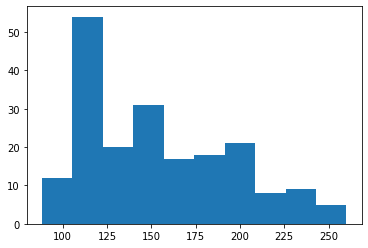

In [26]:
#To check the distribution of data 
plt.hist(parkinsons_df.MDVP_Fo_Hz)

(array([69., 47., 53., 14.,  0.,  1.,  3.,  3.,  0.,  5.]),
 array([102.145 , 151.1335, 200.122 , 249.1105, 298.099 , 347.0875,
        396.076 , 445.0645, 494.053 , 543.0415, 592.03  ]),
 <a list of 10 Patch objects>)

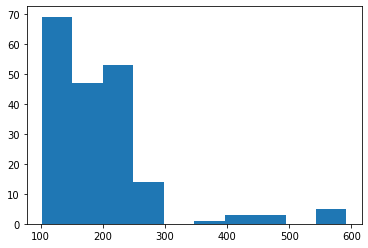

In [27]:
plt.hist(parkinsons_df.MDVP_Fhi_Hz)

(array([45., 46., 44.,  9., 16.,  8.,  7.,  8.,  3.,  9.]),
 array([ 65.476 ,  82.8454, 100.2148, 117.5842, 134.9536, 152.323 ,
        169.6924, 187.0618, 204.4312, 221.8006, 239.17  ]),
 <a list of 10 Patch objects>)

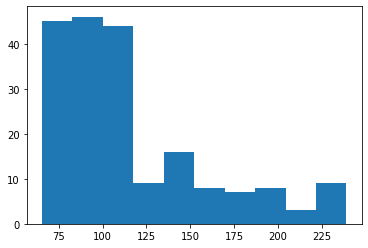

In [28]:
plt.hist(parkinsons_df.MDVP_Flo_Hz)

(array([94., 66., 19.,  4.,  5.,  3.,  0.,  0.,  1.,  3.]),
 array([0.00168 , 0.004828, 0.007976, 0.011124, 0.014272, 0.01742 ,
        0.020568, 0.023716, 0.026864, 0.030012, 0.03316 ]),
 <a list of 10 Patch objects>)

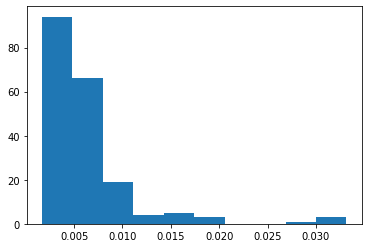

In [29]:
plt.hist(parkinsons_df.MDVP_Jitter_percent)

(array([100.,  45.,  33.,   8.,   3.,   3.,   1.,   0.,   1.,   1.]),
 array([7.000e-06, 3.230e-05, 5.760e-05, 8.290e-05, 1.082e-04, 1.335e-04,
        1.588e-04, 1.841e-04, 2.094e-04, 2.347e-04, 2.600e-04]),
 <a list of 10 Patch objects>)

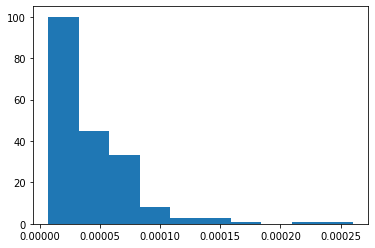

In [30]:
plt.hist(parkinsons_df.MDVP_Jitter_Abs)

(array([110.,  58.,  13.,   4.,   4.,   2.,   0.,   1.,   2.,   1.]),
 array([0.00068 , 0.002756, 0.004832, 0.006908, 0.008984, 0.01106 ,
        0.013136, 0.015212, 0.017288, 0.019364, 0.02144 ]),
 <a list of 10 Patch objects>)

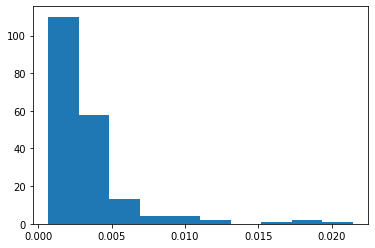

In [31]:
plt.hist(parkinsons_df.MDVP_RAP)

(array([100.,  64.,  13.,   7.,   5.,   2.,   0.,   1.,   2.,   1.]),
 array([0.00092 , 0.002786, 0.004652, 0.006518, 0.008384, 0.01025 ,
        0.012116, 0.013982, 0.015848, 0.017714, 0.01958 ]),
 <a list of 10 Patch objects>)

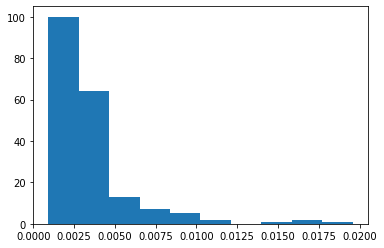

In [32]:
plt.hist(parkinsons_df.MDVP_PPQ)

(array([110.,  58.,  13.,   4.,   4.,   2.,   0.,   1.,   2.,   1.]),
 array([0.00204 , 0.008269, 0.014498, 0.020727, 0.026956, 0.033185,
        0.039414, 0.045643, 0.051872, 0.058101, 0.06433 ]),
 <a list of 10 Patch objects>)

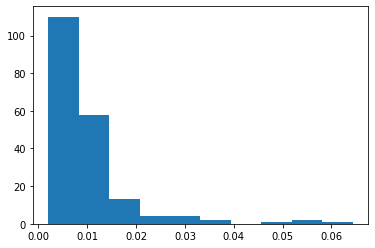

In [33]:
plt.hist(parkinsons_df.Jitter_DDP)

(array([83., 45., 30., 13., 11.,  7.,  2.,  3.,  0.,  1.]),
 array([0.00954 , 0.020494, 0.031448, 0.042402, 0.053356, 0.06431 ,
        0.075264, 0.086218, 0.097172, 0.108126, 0.11908 ]),
 <a list of 10 Patch objects>)

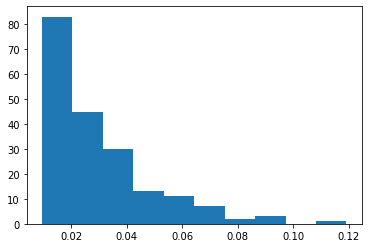

In [34]:
plt.hist(parkinsons_df.MDVP_Shimmer)

(array([89., 50., 28., 10.,  9.,  3.,  4.,  1.,  0.,  1.]),
 array([0.085 , 0.2067, 0.3284, 0.4501, 0.5718, 0.6935, 0.8152, 0.9369,
        1.0586, 1.1803, 1.302 ]),
 <a list of 10 Patch objects>)

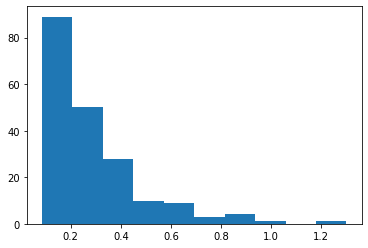

In [35]:
plt.hist(parkinsons_df.MDVP_Shimmer_dB)

(array([72., 49., 24., 19., 11.,  9.,  6.,  2.,  0.,  3.]),
 array([0.00455 , 0.009742, 0.014934, 0.020126, 0.025318, 0.03051 ,
        0.035702, 0.040894, 0.046086, 0.051278, 0.05647 ]),
 <a list of 10 Patch objects>)

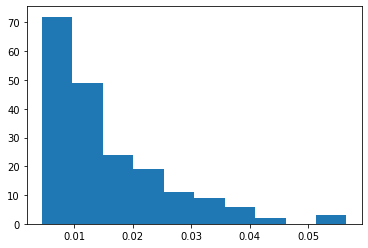

In [36]:
plt.hist(parkinsons_df.Shimmer_APQ3)

(array([92., 50., 24.,  5., 13.,  7.,  3.,  0.,  0.,  1.]),
 array([0.0057 , 0.01307, 0.02044, 0.02781, 0.03518, 0.04255, 0.04992,
        0.05729, 0.06466, 0.07203, 0.0794 ]),
 <a list of 10 Patch objects>)

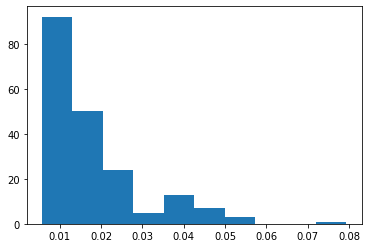

In [37]:
plt.hist(parkinsons_df.Shimmer_APQ5)

(array([112.,  43.,  24.,   7.,   6.,   1.,   1.,   0.,   0.,   1.]),
 array([0.00719 , 0.020249, 0.033308, 0.046367, 0.059426, 0.072485,
        0.085544, 0.098603, 0.111662, 0.124721, 0.13778 ]),
 <a list of 10 Patch objects>)

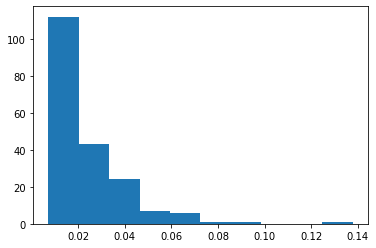

In [38]:
plt.hist(parkinsons_df.MDVP_APQ)

(array([72., 49., 24., 19., 11.,  9.,  6.,  2.,  0.,  3.]),
 array([0.01364 , 0.029218, 0.044796, 0.060374, 0.075952, 0.09153 ,
        0.107108, 0.122686, 0.138264, 0.153842, 0.16942 ]),
 <a list of 10 Patch objects>)

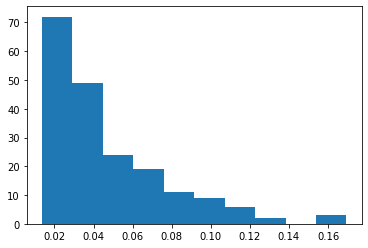

In [39]:
plt.hist(parkinsons_df.Shimmer_DDA)

(array([161.,  17.,   7.,   5.,   0.,   2.,   1.,   0.,   1.,   1.]),
 array([0.00065 , 0.032067, 0.063484, 0.094901, 0.126318, 0.157735,
        0.189152, 0.220569, 0.251986, 0.283403, 0.31482 ]),
 <a list of 10 Patch objects>)

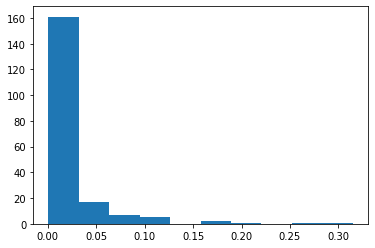

In [40]:
plt.hist(parkinsons_df.NHR)

(array([ 4.,  6.,  9., 11., 41., 44., 41., 31.,  3.,  5.]),
 array([ 8.441 , 10.9016, 13.3622, 15.8228, 18.2834, 20.744 , 23.2046,
        25.6652, 28.1258, 30.5864, 33.047 ]),
 <a list of 10 Patch objects>)

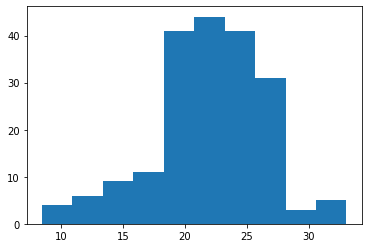

In [41]:
plt.hist(parkinsons_df.HNR)

(array([ 48.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 147.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

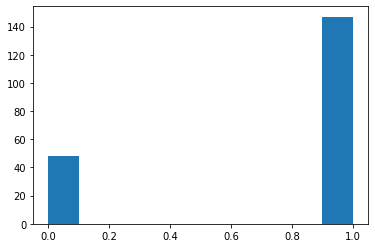

In [42]:
plt.hist(parkinsons_df.status)

(array([ 4., 12., 14., 22., 35., 22., 20., 25., 26., 15.]),
 array([0.25657  , 0.2994281, 0.3422862, 0.3851443, 0.4280024, 0.4708605,
        0.5137186, 0.5565767, 0.5994348, 0.6422929, 0.685151 ]),
 <a list of 10 Patch objects>)

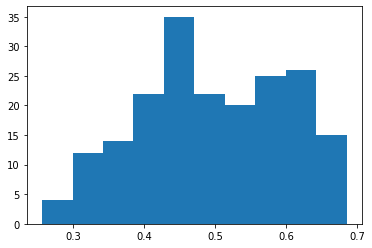

In [43]:
plt.hist(parkinsons_df.RPDE)

(array([ 2.,  2., 19., 26., 26., 27., 34., 27., 17., 15.]),
 array([0.574282 , 0.5993826, 0.6244832, 0.6495838, 0.6746844, 0.699785 ,
        0.7248856, 0.7499862, 0.7750868, 0.8001874, 0.825288 ]),
 <a list of 10 Patch objects>)

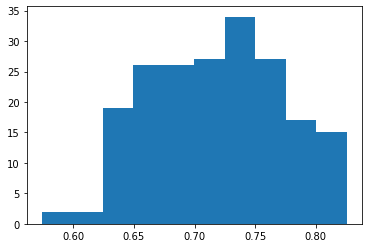

In [44]:
plt.hist(parkinsons_df.DFA)

(array([ 6., 24., 28., 37., 44., 21., 20.,  7.,  4.,  4.]),
 array([-7.964984 , -7.4118887, -6.8587934, -6.3056981, -5.7526028,
        -5.1995075, -4.6464122, -4.0933169, -3.5402216, -2.9871263,
        -2.434031 ]),
 <a list of 10 Patch objects>)

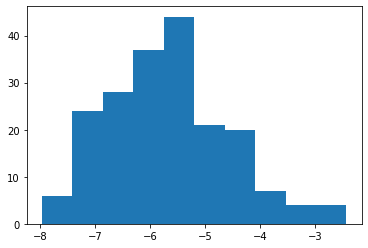

In [45]:
plt.hist(parkinsons_df.spread1)

(array([ 2., 10., 13., 35., 47., 37., 22., 17.,  9.,  3.]),
 array([0.006274 , 0.0506959, 0.0951178, 0.1395397, 0.1839616, 0.2283835,
        0.2728054, 0.3172273, 0.3616492, 0.4060711, 0.450493 ]),
 <a list of 10 Patch objects>)

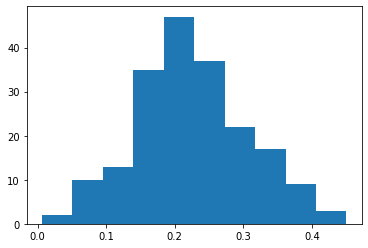

In [46]:
plt.hist(parkinsons_df.spread2)

(array([ 3., 12., 34., 39., 48., 29., 17.,  9.,  3.,  1.]),
 array([1.423287 , 1.6480738, 1.8728606, 2.0976474, 2.3224342, 2.547221 ,
        2.7720078, 2.9967946, 3.2215814, 3.4463682, 3.671155 ]),
 <a list of 10 Patch objects>)

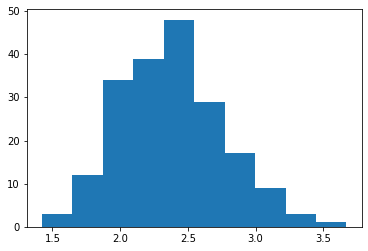

In [47]:
plt.hist(parkinsons_df.D2)

(array([11., 40., 44., 40., 30., 10., 13.,  3.,  3.,  1.]),
 array([0.044539 , 0.0928218, 0.1411046, 0.1893874, 0.2376702, 0.285953 ,
        0.3342358, 0.3825186, 0.4308014, 0.4790842, 0.527367 ]),
 <a list of 10 Patch objects>)

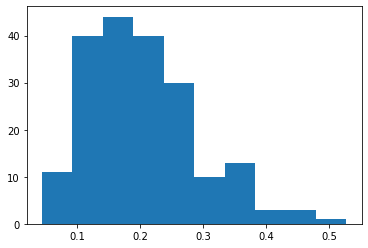

In [48]:
plt.hist(parkinsons_df.PPE)

MDVP_Fhi_Hz, MDVP_Jitter_percent, MDVP_Jitter_Abs, MDVP_RAP,MDVP_PPQ, Jitter_DDP,MDVP_Shimmer, MDVP_Shimmer_dB, Shimmer_APQ3, 
Shimmer_APQ5, MDVP_APQ, Shimmer_DDA and NHR are positively skewed. Since skewness doesnt impact decision tree models no action is required to correct the skewness

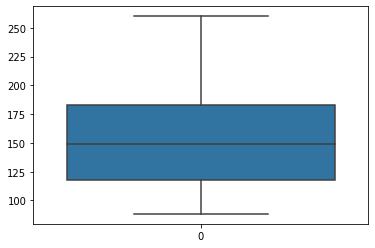

In [49]:
# Check for outliers
sns.boxplot(data=parkinsons_df['MDVP_Fo_Hz'])

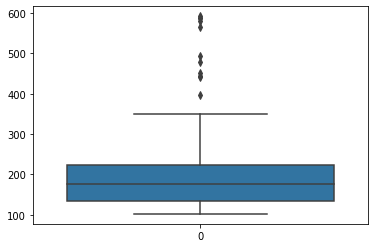

In [50]:
sns.boxplot(data=parkinsons_df['MDVP_Fhi_Hz'])

MDVP:Fhi(Hz) has outliers

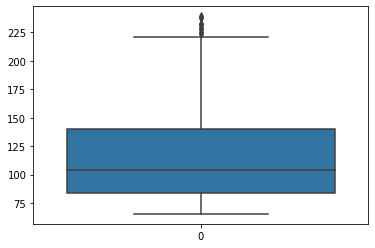

In [51]:
sns.boxplot(data=parkinsons_df['MDVP_Flo_Hz'])

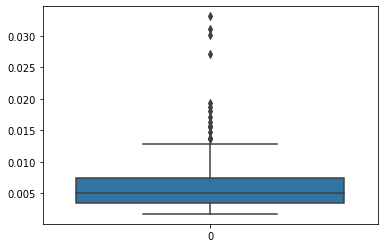

In [52]:
sns.boxplot(data=parkinsons_df['MDVP_Jitter_percent'])

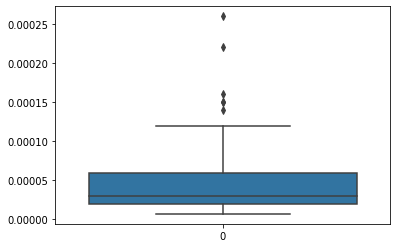

In [53]:
sns.boxplot(data=parkinsons_df['MDVP_Jitter_Abs'])

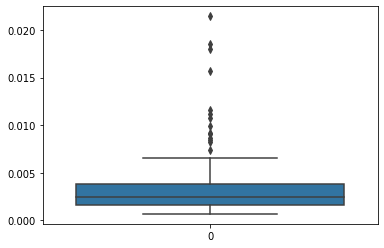

In [54]:
sns.boxplot(data=parkinsons_df['MDVP_RAP'])

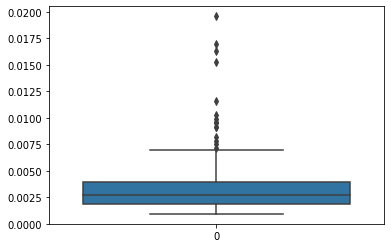

In [55]:
sns.boxplot(data=parkinsons_df['MDVP_PPQ'])

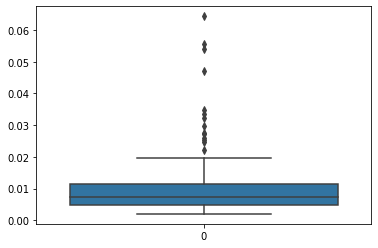

In [56]:
sns.boxplot(data=parkinsons_df['Jitter_DDP'])

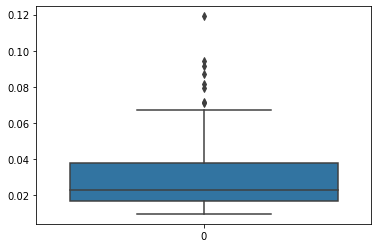

In [57]:
sns.boxplot(data=parkinsons_df['MDVP_Shimmer'])

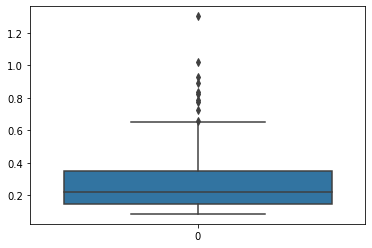

In [58]:
sns.boxplot(data=parkinsons_df['MDVP_Shimmer_dB'])

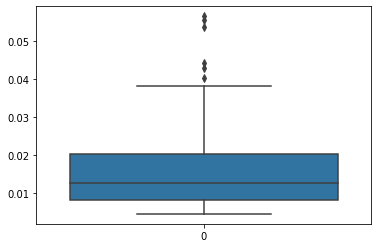

In [59]:
sns.boxplot(data=parkinsons_df['Shimmer_APQ3'])

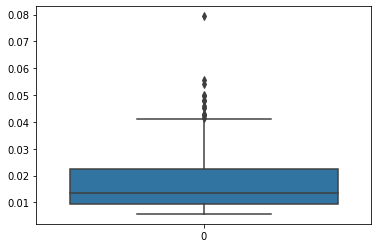

In [60]:
sns.boxplot(data=parkinsons_df['Shimmer_APQ5'])

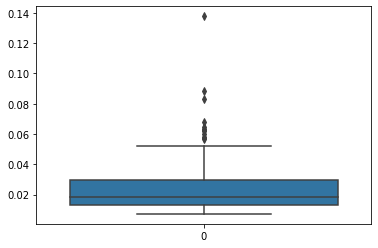

In [61]:
sns.boxplot(data=parkinsons_df['MDVP_APQ'])

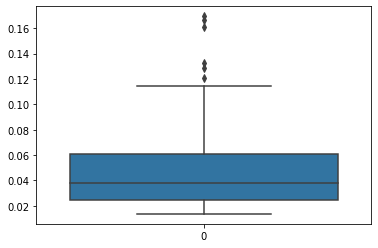

In [62]:
sns.boxplot(data=parkinsons_df['Shimmer_DDA'])

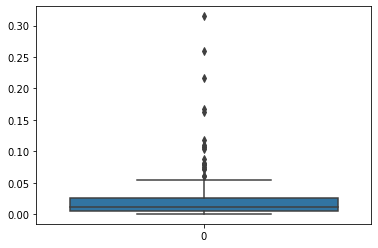

In [63]:
sns.boxplot(data=parkinsons_df['NHR'])

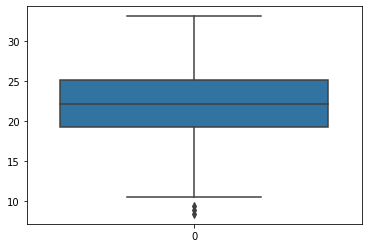

In [64]:
sns.boxplot(data=parkinsons_df['HNR'])

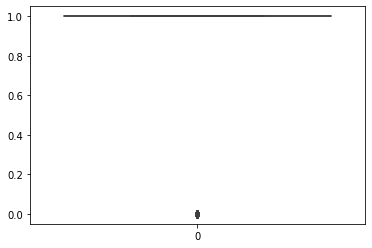

In [65]:
sns.boxplot(data=parkinsons_df['status'])

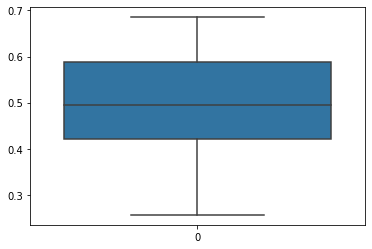

In [66]:
sns.boxplot(data=parkinsons_df['RPDE'])

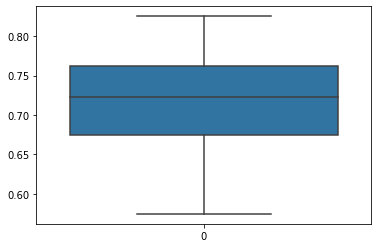

In [67]:
sns.boxplot(data=parkinsons_df['DFA'])

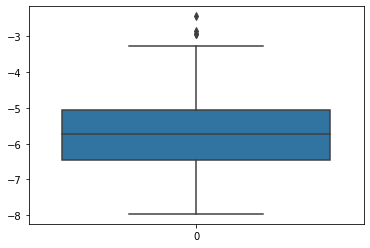

In [68]:
sns.boxplot(data=parkinsons_df['spread1'])

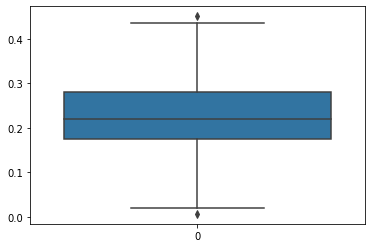

In [69]:
sns.boxplot(data=parkinsons_df['spread2'])

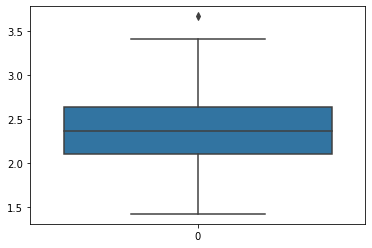

In [70]:
sns.boxplot(data=parkinsons_df['D2'])

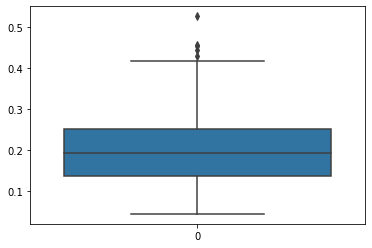

In [71]:
sns.boxplot(data=parkinsons_df['PPE'])

Though outliers are there for Decision trees outliers need not be treated. It takes care of outliers so no further action are done to handle outliers

In [72]:
parkinsons_df2=[]
parkinsons_df2=parkinsons_df.copy(deep=True)

In [73]:
parkinsons_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                   195 non-null object
MDVP_Fo_Hz             195 non-null float64
MDVP_Fhi_Hz            195 non-null float64
MDVP_Flo_Hz            195 non-null float64
MDVP_Jitter_percent    195 non-null float64
MDVP_Jitter_Abs        195 non-null float64
MDVP_RAP               195 non-null float64
MDVP_PPQ               195 non-null float64
Jitter_DDP             195 non-null float64
MDVP_Shimmer           195 non-null float64
MDVP_Shimmer_dB        195 non-null float64
Shimmer_APQ3           195 non-null float64
Shimmer_APQ5           195 non-null float64
MDVP_APQ               195 non-null float64
Shimmer_DDA            195 non-null float64
NHR                    195 non-null float64
HNR                    195 non-null float64
status                 195 non-null int64
RPDE                   195 non-null float64
DFA                    195 non-null float64
spread1           

In [74]:
parkinsons_df.var()

MDVP_Fo_Hz             1.713137e+03
MDVP_Fhi_Hz            8.370703e+03
MDVP_Flo_Hz            1.894113e+03
MDVP_Jitter_percent    2.350440e-05
MDVP_Jitter_Abs        1.212565e-09
MDVP_RAP               8.807685e-06
MDVP_PPQ               7.611952e-06
Jitter_DDP             7.926954e-05
MDVP_Shimmer           3.555839e-04
MDVP_Shimmer_dB        3.797716e-02
Shimmer_APQ3           1.030867e-04
Shimmer_APQ5           1.445695e-04
MDVP_APQ               2.871919e-04
Shimmer_DDA            9.277580e-04
NHR                    1.633651e-03
HNR                    1.958739e+01
status                 1.865186e-01
RPDE                   1.080388e-02
DFA                    3.062054e-03
spread1                1.188553e+00
spread2                6.956521e-03
D2                     1.465351e-01
PPE                    8.121492e-03
dtype: float64

In [81]:
corr_matrix = parkinsons_df.corr().abs()

#Select upper triangle
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))

#find features with high correlation ( > 0.90; Assumption)
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

print(to_drop, "are all very highly correlated with few other columns")

['MDVP_Jitter_Abs', 'MDVP_RAP', 'MDVP_PPQ', 'Jitter_DDP', 'MDVP_Shimmer_dB', 'Shimmer_APQ3', 'Shimmer_APQ5', 'MDVP_APQ', 'Shimmer_DDA', 'NHR', 'PPE'] are all very highly correlated with few other columns


In [82]:
parkinsons_df.corr()['MDVP_Jitter_Abs'].sort_values(ascending=False)

MDVP_Jitter_Abs        1.000000
MDVP_Jitter_percent    0.935714
Jitter_DDP             0.922913
MDVP_RAP               0.922911
MDVP_PPQ               0.897778
NHR                    0.834972
PPE                    0.748162
spread1                0.735779
MDVP_Shimmer_dB        0.716601
MDVP_Shimmer           0.703322
Shimmer_DDA            0.697170
Shimmer_APQ3           0.697153
Shimmer_APQ5           0.648961
MDVP_APQ               0.648793
RPDE                   0.441839
spread2                0.388543
status                 0.338653
D2                     0.310694
DFA                    0.175036
MDVP_Fhi_Hz           -0.029198
MDVP_Flo_Hz           -0.277815
MDVP_Fo_Hz            -0.382027
HNR                   -0.656810
Name: MDVP_Jitter_Abs, dtype: float64

In [83]:
parkinsons_df.corr()['MDVP_RAP'].sort_valuesalues(ascending=False)

MDVP_RAP               1.000000
Jitter_DDP             1.000000
MDVP_Jitter_percent    0.990276
MDVP_PPQ               0.957317
MDVP_Jitter_Abs        0.922911
NHR                    0.919521
MDVP_Shimmer_dB        0.790652
MDVP_Shimmer           0.759581
Shimmer_DDA            0.744919
Shimmer_APQ3           0.744912
MDVP_APQ               0.737455
Shimmer_APQ5           0.709927
PPE                    0.670999
spread1                0.648328
D2                     0.426605
RPDE                   0.342140
spread2                0.324407
status                 0.266668
MDVP_Fhi_Hz            0.097177
DFA                    0.064083
MDVP_Fo_Hz            -0.076194
MDVP_Flo_Hz           -0.100519
HNR                   -0.721543
Name: MDVP_RAP, dtype: float64

In [84]:
parkinsons_df.corr()['MDVP_PPQ'].sort_values(ascending=False)

MDVP_PPQ               1.000000
MDVP_Jitter_percent    0.974256
Jitter_DDP             0.957319
MDVP_RAP               0.957317
MDVP_Jitter_Abs        0.897778
NHR                    0.844604
MDVP_Shimmer_dB        0.839239
MDVP_APQ               0.804139
MDVP_Shimmer           0.797826
Shimmer_APQ5           0.786780
PPE                    0.769647
Shimmer_DDA            0.763592
Shimmer_APQ3           0.763580
spread1                0.716489
D2                     0.412524
spread2                0.407605
RPDE                   0.333274
status                 0.288698
DFA                    0.196301
MDVP_Fhi_Hz            0.091126
MDVP_Flo_Hz           -0.095828
MDVP_Fo_Hz            -0.112165
HNR                   -0.731510
Name: MDVP_PPQ, dtype: float64

In [86]:
parkinsons_df.corr()['Jitter_DDP'].sort_values(ascending=False)

Jitter_DDP             1.000000
MDVP_RAP               1.000000
MDVP_Jitter_percent    0.990276
MDVP_PPQ               0.957319
MDVP_Jitter_Abs        0.922913
NHR                    0.919548
MDVP_Shimmer_dB        0.790621
MDVP_Shimmer           0.759555
Shimmer_DDA            0.744901
Shimmer_APQ3           0.744894
MDVP_APQ               0.737439
Shimmer_APQ5           0.709907
PPE                    0.671005
spread1                0.648328
D2                     0.426556
RPDE                   0.342079
spread2                0.324377
status                 0.266646
MDVP_Fhi_Hz            0.097150
DFA                    0.064026
MDVP_Fo_Hz            -0.076213
MDVP_Flo_Hz           -0.100488
HNR                   -0.721494
Name: Jitter_DDP, dtype: float64

In [87]:
parkinsons_df.corr()['MDVP_Shimmer_dB'].abs().sort_values(ascending=False)

MDVP_Shimmer_dB        1.000000
MDVP_Shimmer           0.987258
Shimmer_APQ5           0.973751
Shimmer_DDA            0.963202
Shimmer_APQ3           0.963198
MDVP_APQ               0.960977
MDVP_PPQ               0.839239
HNR                    0.827805
MDVP_Jitter_percent    0.804289
MDVP_RAP               0.790652
Jitter_DDP             0.790621
NHR                    0.744477
MDVP_Jitter_Abs        0.716601
PPE                    0.695058
spread1                0.652547
D2                     0.512233
spread2                0.454314
RPDE                   0.410684
status                 0.350697
DFA                    0.165157
MDVP_Flo_Hz            0.119089
MDVP_Fo_Hz             0.073742
MDVP_Fhi_Hz            0.043465
Name: MDVP_Shimmer_dB, dtype: float64

In [89]:
parkinsons_df.corr()['Shimmer_APQ3'].abs().sort_values(ascending=False)

Shimmer_APQ3           1.000000
Shimmer_DDA            1.000000
MDVP_Shimmer           0.987625
MDVP_Shimmer_dB        0.963198
Shimmer_APQ5           0.960070
MDVP_APQ               0.896645
HNR                    0.827123
MDVP_PPQ               0.763580
MDVP_Jitter_percent    0.746625
MDVP_RAP               0.744912
Jitter_DDP             0.744894
NHR                    0.716207
MDVP_Jitter_Abs        0.697153
PPE                    0.645377
spread1                0.610967
D2                     0.467265
RPDE                   0.435242
spread2                0.402243
status                 0.347617
DFA                    0.151124
MDVP_Flo_Hz            0.150747
MDVP_Fo_Hz             0.094717
MDVP_Fhi_Hz            0.003743
Name: Shimmer_APQ3, dtype: float64

In [90]:
parkinsons_df.corr()['Shimmer_APQ5'].abs().sort_values(ascending=False)

Shimmer_APQ5           1.000000
MDVP_Shimmer           0.982835
MDVP_Shimmer_dB        0.973751
Shimmer_DDA            0.960072
Shimmer_APQ3           0.960070
MDVP_APQ               0.949146
HNR                    0.813753
MDVP_PPQ               0.786780
MDVP_Jitter_percent    0.725561
MDVP_RAP               0.709927
Jitter_DDP             0.709907
PPE                    0.702456
NHR                    0.658080
MDVP_Jitter_Abs        0.648961
spread1                0.646809
D2                     0.502174
spread2                0.457195
RPDE                   0.399903
status                 0.351148
DFA                    0.213873
MDVP_Flo_Hz            0.101095
MDVP_Fo_Hz             0.070682
MDVP_Fhi_Hz            0.009997
Name: Shimmer_APQ5, dtype: float64

In [91]:
parkinsons_df.corr()['MDVP_APQ'].abs().sort_values(ascending=False)

MDVP_APQ               1.000000
MDVP_Shimmer_dB        0.960977
MDVP_Shimmer           0.950083
Shimmer_APQ5           0.949146
Shimmer_DDA            0.896647
Shimmer_APQ3           0.896645
MDVP_PPQ               0.804139
HNR                    0.800407
MDVP_Jitter_percent    0.758255
MDVP_RAP               0.737455
Jitter_DDP             0.737439
PPE                    0.721694
NHR                    0.694019
spread1                0.673158
MDVP_Jitter_Abs        0.648793
D2                     0.536869
spread2                0.502188
RPDE                   0.451379
status                 0.364316
DFA                    0.157276
MDVP_Flo_Hz            0.107293
MDVP_Fo_Hz             0.077774
MDVP_Fhi_Hz            0.004937
Name: MDVP_APQ, dtype: float64

In [92]:
parkinsons_df.corr()['Shimmer_DDA'].abs().sort_values(ascending=False)

Shimmer_DDA            1.000000
Shimmer_APQ3           1.000000
MDVP_Shimmer           0.987626
MDVP_Shimmer_dB        0.963202
Shimmer_APQ5           0.960072
MDVP_APQ               0.896647
HNR                    0.827130
MDVP_PPQ               0.763592
MDVP_Jitter_percent    0.746635
MDVP_RAP               0.744919
Jitter_DDP             0.744901
NHR                    0.716215
MDVP_Jitter_Abs        0.697170
PPE                    0.645389
spread1                0.610971
D2                     0.467261
RPDE                   0.435237
spread2                0.402223
status                 0.347608
DFA                    0.151132
MDVP_Flo_Hz            0.150737
MDVP_Fo_Hz             0.094732
MDVP_Fhi_Hz            0.003733
Name: Shimmer_DDA, dtype: float64

In [93]:
parkinsons_df.corr()['NHR'].abs().sort_values(ascending=False)

NHR                    1.000000
Jitter_DDP             0.919548
MDVP_RAP               0.919521
MDVP_Jitter_percent    0.906959
MDVP_PPQ               0.844604
MDVP_Jitter_Abs        0.834972
MDVP_Shimmer_dB        0.744477
MDVP_Shimmer           0.722194
Shimmer_DDA            0.716215
Shimmer_APQ3           0.716207
HNR                    0.714072
MDVP_APQ               0.694019
Shimmer_APQ5           0.658080
PPE                    0.552591
spread1                0.540865
D2                     0.470949
RPDE                   0.370890
spread2                0.318099
status                 0.189429
MDVP_Fhi_Hz            0.163766
DFA                    0.131882
MDVP_Flo_Hz            0.108670
MDVP_Fo_Hz             0.021981
Name: NHR, dtype: float64

In [94]:
parkinsons_df.corr()['PPE'].abs().sort_values(ascending=False)

PPE                    1.000000
spread1                0.962435
MDVP_PPQ               0.769647
MDVP_Jitter_Abs        0.748162
MDVP_APQ               0.721694
MDVP_Jitter_percent    0.721543
Shimmer_APQ5           0.702456
MDVP_Shimmer_dB        0.695058
MDVP_Shimmer           0.693771
HNR                    0.692876
Jitter_DDP             0.671005
MDVP_RAP               0.670999
Shimmer_DDA            0.645389
Shimmer_APQ3           0.645377
spread2                0.644711
NHR                    0.552591
RPDE                   0.545886
status                 0.531039
D2                     0.480585
MDVP_Fo_Hz             0.372356
MDVP_Flo_Hz            0.340071
DFA                    0.270445
MDVP_Fhi_Hz            0.069543
Name: PPE, dtype: float64

In [77]:
parkinsons_df.corr()['status'].abs().sort_values(ascending=False)

status                 1.000000
spread1                0.564838
PPE                    0.531039
spread2                0.454842
MDVP_Fo_Hz             0.383535
MDVP_Flo_Hz            0.380200
MDVP_Shimmer           0.367430
MDVP_APQ               0.364316
HNR                    0.361515
Shimmer_APQ5           0.351148
MDVP_Shimmer_dB        0.350697
Shimmer_APQ3           0.347617
Shimmer_DDA            0.347608
D2                     0.340232
MDVP_Jitter_Abs        0.338653
RPDE                   0.308567
MDVP_PPQ               0.288698
MDVP_Jitter_percent    0.278220
MDVP_RAP               0.266668
Jitter_DDP             0.266646
DFA                    0.231739
NHR                    0.189429
MDVP_Fhi_Hz            0.166136
Name: status, dtype: float64

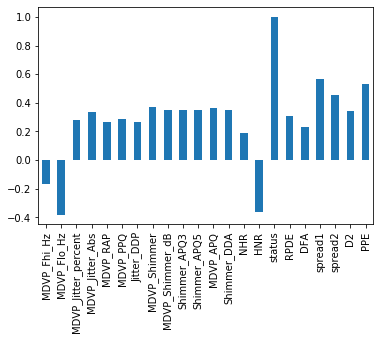

In [78]:
parkinsons_df.corr()['status'][1:].plot.bar()

MDVP High frequency, MDVP Low frequency and HNR are negatively correlated with status

MDVP high frequncy has very less correlation with status column among others

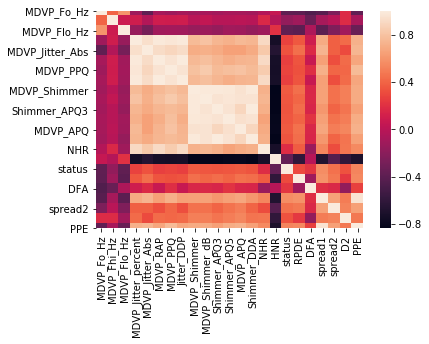

In [79]:
sns.heatmap(parkinsons_df.corr())

In [ ]:
sns.pairplot(parkinsons_df,hue='status')

C:\Users\aanan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\aanan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


Observations :
MDVP_RAP and Jitter_DDP are very highly correlated with correlation = 1
Shimmer_DDA and Shimmer_APQ3 are very highly correlated with correlation = 1

Jitter variables are highly correlated with each other. NHR, MDVP_RAP, Jitter_DDP, MDVP_Jitter_Abs, MDVP_PPQ and MDVP_Jitter_percent are highly correlated
Shimmer variables are highly correlated with each other. MDVP_APQ, MDVP_Shimmer, MDVP_Shimmer_dB, Shimmer_APQ5, Shimmer_DDA and Shimmer_APQ3 are highly correlated

First iteration lets consider all the features except the name column which has no impact of the target variable and also MDVP High frequency column which has very very less correlation with status column

In [1478]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

cols=['name','MDVP_Fhi_Hz','status']
X =  parkinsons_df.drop(cols,axis=1,inplace=False)
y =  parkinsons_df.pop("status")

train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=0.30, random_state=15)

In [1479]:
X.shape

(195, 21)

In [1480]:
y.shape

(195,)

In [1481]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state=15 )

In [1482]:
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=15, splitter='best')

In [1483]:
test_pred=dt_model.predict(test_set)

In [1484]:
dt_model.score(train_set , train_labels) 

1.0

In [1485]:
dt_model.score(test_set , test_labels)      # performance on test data

0.9491525423728814

In [1486]:
from IPython.display import Image  
#import pydotplus as pydot
import graphviz
from sklearn import tree
from os import system

train_char_label = ['1', '2', '3']
Parkinsons_Tree_File = open('parkinsons_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Parkinsons_Tree_File, feature_names = list(train_set), class_names = list(train_char_label))

Parkinsons_Tree_File.close()


# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = train_set.columns))


                          Imp
MDVP_Fo_Hz           0.036254
MDVP_Flo_Hz          0.231434
MDVP_Jitter_percent  0.000000
MDVP_Jitter_Abs      0.036725
MDVP_RAP             0.000000
MDVP_PPQ             0.000000
Jitter_DDP           0.000000
MDVP_Shimmer         0.000000
MDVP_Shimmer_dB      0.000000
Shimmer_APQ3         0.000000
Shimmer_APQ5         0.000000
MDVP_APQ             0.088762
Shimmer_DDA          0.000000
NHR                  0.000000
HNR                  0.096117
RPDE                 0.084550
DFA                  0.000000
spread1              0.000000
spread2              0.035386
D2                   0.000000
PPE                  0.390773


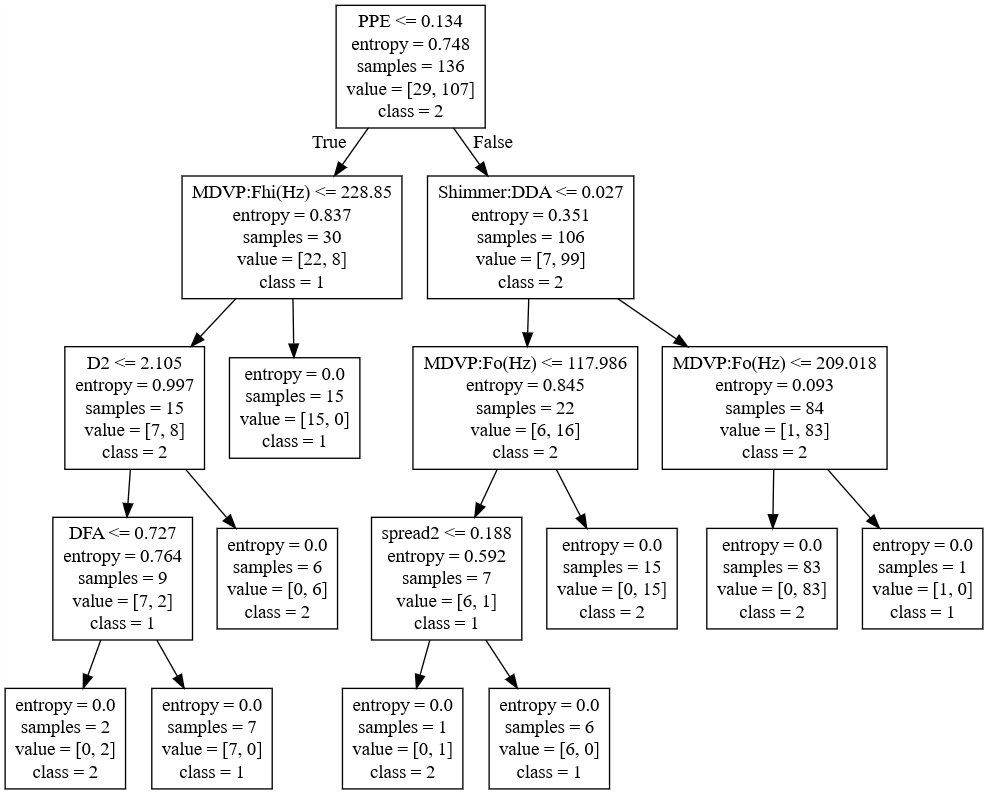

In [1487]:
# You can also copy the script in the .dot file and paste it at http://webgraphviz.com/ to get tree view 
#or create a .png as below

system("dot -Tpng parkinsons_tree.dot -o parkinsons_tree.png")   # This command is to the OS
Image("Parkinsons_1.png")        # use the image command to read the .png file and print on screen

##### Cross tab

In [1488]:
pd.crosstab(test_labels,test_pred,rownames=['Actual'],colnames=['Predicted'],margins=True)

Predicted,0,1,All
Actual,,,
0,12,2,14
1,1,44,45
All,13,46,59


In [1489]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_labels,test_pred)
print(confusion_matrix)

[[12  2]
 [ 1 44]]


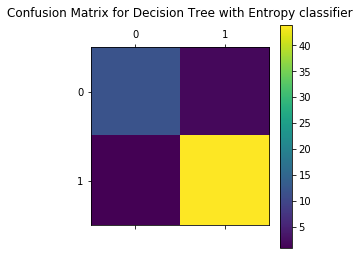

In [1490]:
plt.matshow(confusion_matrix)
plt.title("Confusion Matrix for Decision Tree with Entropy classifier\n")
plt.colorbar()
plt.show()

In [1491]:
from sklearn.metrics import classification_report

In [1492]:
print(classification_report(test_labels,test_pred))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.96      0.98      0.97        45

    accuracy                           0.95        59
   macro avg       0.94      0.92      0.93        59
weighted avg       0.95      0.95      0.95        59



### Regularizing the Decision Tree

#### Effect of Max depth

In [1493]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state=15,max_depth=6)
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=15, splitter='best')

In [1494]:
parkinsons_tree_regularized = open('parkinsons_tree_regularized.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file= parkinsons_tree_regularized , feature_names = list(train_set), class_names = list(train_char_label))

parkinsons_tree_regularized.close()

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = train_set.columns))


                          Imp
MDVP_Fo_Hz           0.036254
MDVP_Flo_Hz          0.231434
MDVP_Jitter_percent  0.000000
MDVP_Jitter_Abs      0.036725
MDVP_RAP             0.000000
MDVP_PPQ             0.000000
Jitter_DDP           0.000000
MDVP_Shimmer         0.000000
MDVP_Shimmer_dB      0.000000
Shimmer_APQ3         0.000000
Shimmer_APQ5         0.000000
MDVP_APQ             0.088762
Shimmer_DDA          0.000000
NHR                  0.000000
HNR                  0.096117
RPDE                 0.084550
DFA                  0.000000
spread1              0.000000
spread2              0.035386
D2                   0.000000
PPE                  0.390773


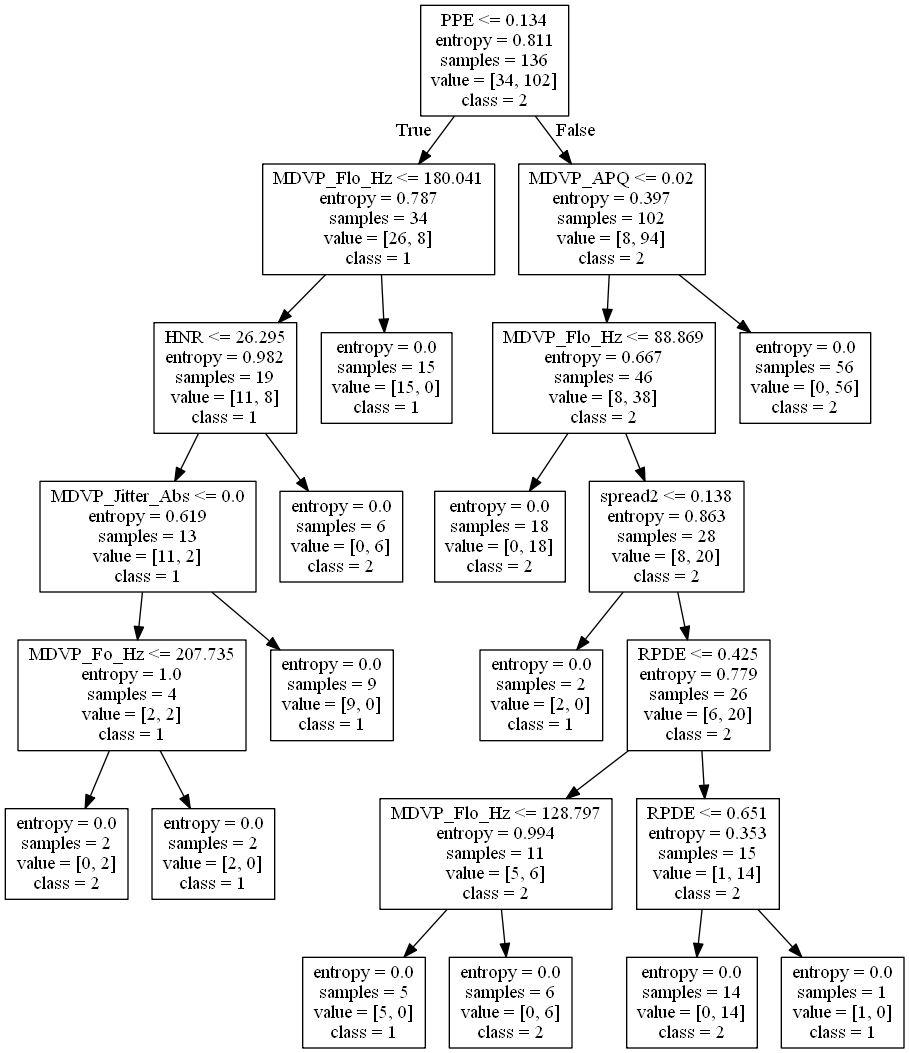

In [1495]:
# You can also copy the script in the .dot file and paste it at http://webgraphviz.com/ to get tree view
# or create a .png as below
system("dot -Tpng parkinsons_tree_regularized.dot -o parkinsons_tree_regularized.png")
Image("Parkinsons_tree_regularized.png")

In [1496]:
test_reg_pred = dt_model.predict(test_set)

In [1497]:
dt_model.score(train_set , train_labels) 

1.0

In [1498]:
dt_model.score(test_set , test_labels)

0.9491525423728814

In [1499]:
pd.crosstab(test_labels,test_reg_pred,rownames=['Actual'],colnames=['Predicted'],margins=True)

Predicted,0,1,All
Actual,,,
0,12,2,14
1,1,44,45
All,13,46,59


In [1501]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_labels,test_reg_pred)
print(confusion_matrix)

[[12  2]
 [ 1 44]]


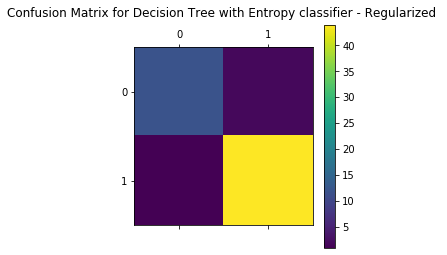

In [1502]:
plt.matshow(confusion_matrix)
plt.title("Confusion Matrix for Decision Tree with Entropy classifier - Regularized \n")
plt.colorbar()
plt.show()

In [1504]:
from sklearn.metrics import classification_report
print(classification_report(test_labels,test_reg_pred))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.96      0.98      0.97        45

    accuracy                           0.95        59
   macro avg       0.94      0.92      0.93        59
weighted avg       0.95      0.95      0.95        59



Usually Regularisation fixes the overfitting problem but for the given set of features the train and test accuracies remains the same at max_depth = 6.

Let's try with other values for Max_depth and see the effect
NOTE: As we are mainly doing this exercise to see the effect on the accuracies, we are not displaying the tree here for every iteration. Same is the case with min samples leaf column impact assessment

At Max depth =  1 :
Training score:  0.8823529411764706
Testing score:  0.8305084745762712
At Max depth =  2 :
Training score:  0.8823529411764706
Testing score:  0.8305084745762712
At Max depth =  3 :
Training score:  0.9264705882352942
Testing score:  0.8813559322033898
At Max depth =  4 :
Training score:  0.9411764705882353
Testing score:  0.8983050847457628
At Max depth =  5 :
Training score:  0.9558823529411765
Testing score:  0.9152542372881356
At Max depth =  6 :
Training score:  1.0
Testing score:  0.9491525423728814
At Max depth =  7 :
Training score:  1.0
Testing score:  0.9491525423728814
At Max depth =  8 :
Training score:  1.0
Testing score:  0.9491525423728814
At Max depth =  9 :
Training score:  1.0
Testing score:  0.9491525423728814
At Max depth =  10 :
Training score:  1.0
Testing score:  0.9491525423728814
At Max depth =  11 :
Training score:  1.0
Testing score:  0.9491525423728814
At Max depth =  12 :
Training score:  1.0
Testing score:  0.9491525423728814
At Max dep

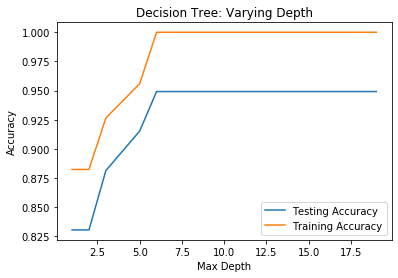

In [1505]:
train_plt = []
test_plt = []
for k in range(1,20,1):
    print("At Max depth = ",k,":")
    dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state=15,max_depth=k)
    dt_model.fit(train_set, train_labels)
    print("Training score: " ,dt_model.score(train_set , train_labels))
    print("Testing score: ",dt_model.score(test_set , test_labels))
    train_plt.append(dt_model.score(train_set , train_labels))
    test_plt.append(dt_model.score(test_set , test_labels))
    
plt.title('Decision Tree: Varying Depth')
plt.plot(range(1,20), test_plt, label = 'Testing Accuracy')
plt.plot(range(1,20), train_plt, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

For the selected set of features max_depth <=5 avoids overfitting but testing score also seems to reduce along with it. Looks like Depth of >=6 is optimal where though the training score 1(leading to overfitting)
testing score is stable at 94.91%

#### Effect of min sample leaves

At Min sample leaf =  1 :
Training score:  1.0
Testing score:  0.9491525423728814
At Min sample leaf =  2 :
Training score:  0.9926470588235294
Testing score:  0.8983050847457628
At Min sample leaf =  3 :
Training score:  0.9705882352941176
Testing score:  0.8983050847457628
At Min sample leaf =  4 :
Training score:  0.9632352941176471
Testing score:  0.8983050847457628
At Min sample leaf =  5 :
Training score:  0.9632352941176471
Testing score:  0.8983050847457628
At Min sample leaf =  6 :
Training score:  0.9558823529411765
Testing score:  0.9152542372881356
At Min sample leaf =  7 :
Training score:  0.9264705882352942
Testing score:  0.9322033898305084
At Min sample leaf =  8 :
Training score:  0.9264705882352942
Testing score:  0.9322033898305084
At Min sample leaf =  9 :
Training score:  0.9191176470588235
Testing score:  0.9322033898305084
At Min sample leaf =  10 :
Training score:  0.8823529411764706
Testing score:  0.864406779661017
At Min sample leaf =  11 :
Training score:  0

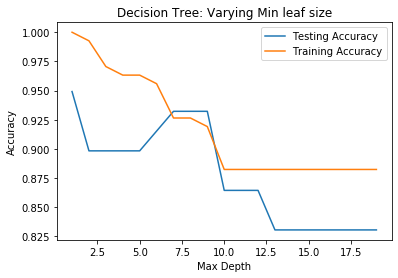

In [1506]:
train_plt = []
test_plt = []
for k in range(1,20,1):
    print("At Min sample leaf = ",k,":")
    dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state=15,min_samples_leaf=k)
    dt_model.fit(train_set, train_labels)
    print("Training score: " ,dt_model.score(train_set , train_labels))
    print("Testing score: ",dt_model.score(test_set , test_labels))
    train_plt.append(dt_model.score(train_set , train_labels))
    test_plt.append(dt_model.score(test_set , test_labels))
    
plt.title('Decision Tree: Varying Min leaf size')
plt.plot(range(1,20), test_plt, label = 'Testing Accuracy')
plt.plot(range(1,20), train_plt, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

#### Random Forest Classifier

In [1507]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100,max_leaf_nodes=20,random_state=15)

In [1508]:
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=15, verbose=0,
                       warm_start=False)

In [1509]:
clf=clf.fit(train_set,train_labels)
predictions = clf.predict(test_set)

In [1510]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, predictions)

0.9322033898305084

With the default criterion as 'gini' random forest gives accuracy score of 93.22%

In [1511]:
pd.crosstab(test_labels,predictions,rownames=['Actual'],colnames=['Predicted'],margins=True)

Predicted,0,1,All
Actual,,,
0,10,4,14
1,0,45,45
All,10,49,59


In [1512]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_labels,predictions)
print(confusion_matrix)

[[10  4]
 [ 0 45]]


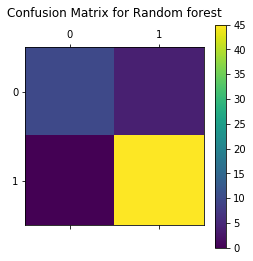

In [1515]:
plt.matshow(confusion_matrix)
plt.title("Confusion Matrix for Random forest\n")
plt.colorbar()
plt.show()

In [1517]:
from sklearn.metrics import classification_report
print(classification_report(test_labels,predictions))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83        14
           1       0.92      1.00      0.96        45

    accuracy                           0.93        59
   macro avg       0.96      0.86      0.90        59
weighted avg       0.94      0.93      0.93        59



In [1518]:
clf2 = RandomForestClassifier(n_estimators=100,criterion='entropy',max_leaf_nodes=20,random_state=15)

In [1519]:
clf2

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=15, verbose=0,
                       warm_start=False)

In [1520]:
clf2=clf2.fit(train_set,train_labels)
predictions = clf2.predict(test_set)
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, predictions)

0.9152542372881356

With the select features, Random forest gives 91.5% accuracy using entropy method

For selected set of features we thus conclude that Decision tree with entropy method at Max depth > = 6 gives the best testing accuracy if the min samples leaf is considered as 1